In [ ]:
##Get the data
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip'

--2023-06-26 10:39:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 74.125.199.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   115MB/s    in 0.9s    

2023-06-26 10:39:55 (115 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
#!unzip pizza_steak.zip

Archive:  pizza_steak.zip
   creating: pizza_steak/
   creating: pizza_steak/test/
   creating: pizza_steak/train/
   creating: pizza_steak/test/steak/
   creating: pizza_steak/test/pizza/
   creating: pizza_steak/train/steak/
   creating: pizza_steak/train/pizza/
  inflating: pizza_steak/test/steak/413497.jpg  
  inflating: pizza_steak/test/steak/2246332.jpg  
  inflating: pizza_steak/test/steak/2649745.jpg  
  inflating: pizza_steak/test/steak/2382600.jpg  
  inflating: pizza_steak/test/steak/296375.jpg  
  inflating: pizza_steak/test/steak/2484823.jpg  
  inflating: pizza_steak/test/steak/400951.jpg  
  inflating: pizza_steak/test/steak/285269.jpg  
  inflating: pizza_steak/test/steak/2475366.jpg  
  inflating: pizza_steak/test/steak/1982192.jpg  
  inflating: pizza_steak/test/steak/2071320.jpg  
  inflating: pizza_steak/test/steak/2353677.jpg  
  inflating: pizza_steak/test/steak/2921355.jpg  
  inflating: pizza_steak/test/steak/3297938.jpg  
  inflating: pizza_steak/test/steak/116

In [ ]:
import zipfile

In [ ]:
local = '/content/pizza_steak.zip'
ref = zipfile.ZipFile(local)
ref.extractall()
ref.close()

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


##Becoming one with data

In [ ]:
!ls  pizza_steak/train/pizza | head -4

1008104.jpg
1008144.jpg
1008844.jpg
1008941.jpg


In [ ]:
import os

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} files in '{dirpath}'")

there are 2 directories and 0 files in 'pizza_steak'
there are 2 directories and 0 files in 'pizza_steak/train'
there are 0 directories and 750 files in 'pizza_steak/train/steak'
there are 0 directories and 750 files in 'pizza_steak/train/pizza'
there are 2 directories and 0 files in 'pizza_steak/test'
there are 0 directories and 250 files in 'pizza_steak/test/steak'
there are 0 directories and 250 files in 'pizza_steak/test/pizza'


In [ ]:
#Alternate way to get number of files
num_images_pizza_train = len(os.listdir('pizza_steak/train/pizza'))
num_images_pizza_train

750

In [ ]:
#visualize
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
#lets visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = os.path.join(target_dir, target_class)
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image[0])
    img = os.path.join(target_folder, random_image[0])
    img = mpimg.imread(img)
    plt.imshow(img)
    plt.title(target_class)
    plt.axis(False)
    print(f"Image shape: {img.shape}")

    return img


1828050.jpg
Image shape: (307, 512, 3)


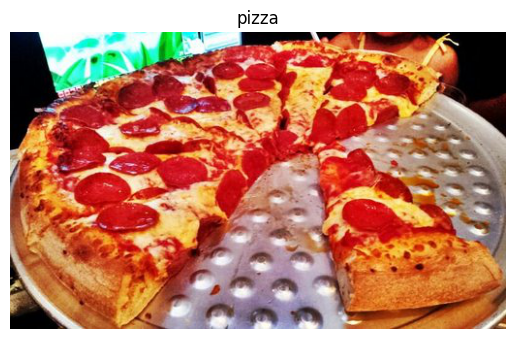

In [ ]:
#view train images
train_dir = 'pizza_steak/train'
target_class = 'pizza'
img = view_random_image(train_dir, target_class)

while observing different sample, we observe that the size of the images are different

In [ ]:
type(img), img.shape

(numpy.ndarray, (307, 512, 3))

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(307, 512, 3), dtype=uint8, numpy=
array([[[  0,   8,  27],
        [  0,   8,  29],
        [  1,   9,  32],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   8,  27],
        [  0,   8,  29],
        [  1,   9,  32],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   7,  26],
        [  0,   8,  29],
        [  0,   8,  31],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [204, 153, 106],
        [224, 173, 120],
        [232, 179, 125]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [146,  95,  48],
        [155, 104,  51],
        [155, 102,  48]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [133,  82,  3

## Prepocess the image data

In [ ]:
#normalize
img_norm = img/255.
img_norm

array([[[0.        , 0.03137255, 0.10588235],
        [0.        , 0.03137255, 0.11372549],
        [0.00392157, 0.03529412, 0.1254902 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.03137255, 0.10588235],
        [0.        , 0.03137255, 0.11372549],
        [0.00392157, 0.03529412, 0.1254902 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.02745098, 0.10196078],
        [0.        , 0.03137255, 0.11372549],
        [0.        , 0.03137255, 0.12156863],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set random seed
tf.random.set_seed=42

train_dir ='/content/pizza_steak/train'
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(224, 224),
                                                    class_mode='binary',
                                                    batch_size=32,
                                                    seed=42)
test_dir = '/content/pizza_steak/test'
val_datagen = ImageDataGenerator(rescale=1./255.)
val_generator = val_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                class_mode='binary',
                                                batch_size=32,
                                                seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_generator), len(val_generator)

(47, 16)

In [ ]:
#Build a CNN model (tiny VGG net)

model1 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation='softmax')
])

model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history1 = model1.fit(train_generator,
           epochs=5,
           steps_per_epoch=len(train_generator),
           validation_data=val_generator,
           validation_steps=len(val_generator))

Epoch 1/5
47/47 [==============================] - 30s 306ms/step - loss: 0.6684 - accuracy: 0.5000 - val_loss: 0.6111 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 278ms/step - loss: 0.5896 - accuracy: 0.5000 - val_loss: 0.4791 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 235ms/step - loss: 0.4601 - accuracy: 0.5000 - val_loss: 0.3485 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 212ms/step - loss: 0.3896 - accuracy: 0.5000 - val_loss: 0.3392 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 223ms/step - loss: 0.3620 - accuracy: 0.5000 - val_loss: 0.3204 - val_accuracy: 0.5000


In [ ]:
#Build a CNN model (tiny VGG net)

model1 = tf.keras.Sequential([
          tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history1 = model1.fit(train_generator,
           epochs=5,
           steps_per_epoch=len(train_generator),
           validation_data=val_generator,
           validation_steps=len(val_generator))

Epoch 1/5
47/47 [==============================] - 13s 238ms/step - loss: 0.5905 - accuracy: 0.6880 - val_loss: 0.4521 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4556 - accuracy: 0.7967 - val_loss: 0.3906 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.4041 - accuracy: 0.8293 - val_loss: 0.3740 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3181 - accuracy: 0.8640 - val_loss: 0.3873 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 11s 230ms/step - loss: 0.2303 - accuracy: 0.9140 - val_loss: 0.3882 - val_accuracy: 0.8360


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

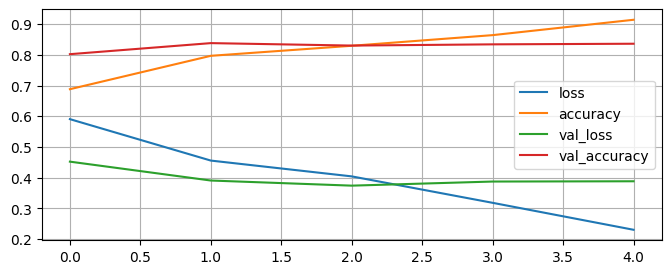

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(8,3), grid=True)
plt.show()

In [ ]:
##using same model

tf.random.set_seed=42

#build_model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model2.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history2 = model2.fit(train_generator,
           epochs=5,
           steps_per_epoch=len(train_generator),
           validation_data=val_generator,
           validation_steps=len(val_generator))

Epoch 1/5
47/47 [==============================] - 12s 218ms/step - loss: 0.7815 - accuracy: 0.4947 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


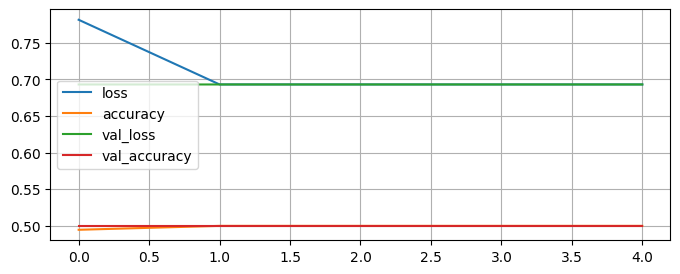

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8,3), grid=True)
plt.show()

parameters very high compared to CNN model

In [ ]:
##using same model

tf.random.set_seed=42

#build_model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history3 = model3.fit(train_generator,
           epochs=5,
           steps_per_epoch=len(train_generator),
           validation_data=val_generator,
           validation_steps=len(val_generator))

Epoch 1/5
47/47 [==============================] - 14s 266ms/step - loss: 2.8370 - accuracy: 0.6180 - val_loss: 0.9605 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 10s 218ms/step - loss: 0.7863 - accuracy: 0.7173 - val_loss: 1.1427 - val_accuracy: 0.6620
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6547 - accuracy: 0.7280 - val_loss: 0.7687 - val_accuracy: 0.6380
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5335 - accuracy: 0.7787 - val_loss: 0.7395 - val_accuracy: 0.6920
Epoch 5/5
47/47 [==============================] - 10s 207ms/step - loss: 0.5891 - accuracy: 0.7600 - val_loss: 0.5286 - val_accuracy: 0.7320


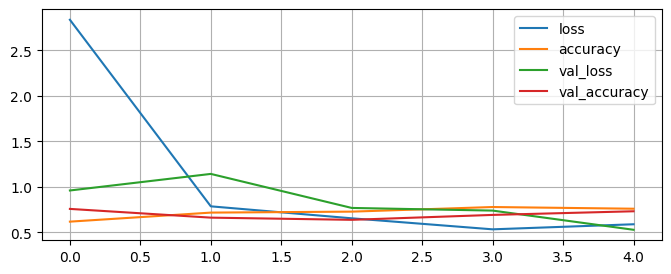

In [ ]:
pd.DataFrame(history3.history).plot(figsize=(8,3), grid=True)
plt.show()

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compare the above model with CNN model1, no where near performance
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
times = int(15073201/31101)
print(f"Parameter size Dense vs CNN model was {times} times big")

Parameter size Dense vs CNN model was 484 times big


##Binary_classification. Lets break it down

996684.jpg
Image shape: (512, 308, 3)
899818.jpg
Image shape: (384, 512, 3)


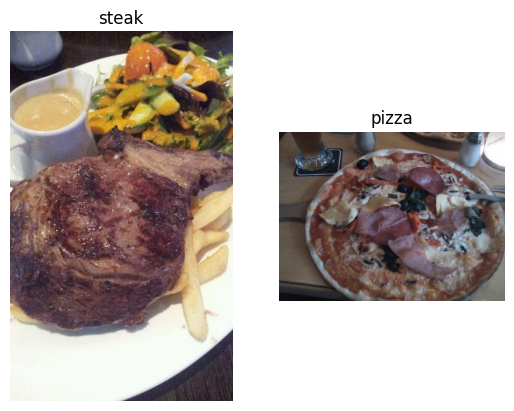

In [ ]:
### Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image(train_dir, 'steak')
plt.subplot(1,2,2)
pizza_img = view_random_image(train_dir, 'pizza')

In [ ]:
### Prepocess thedata
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

Why batching?
- million of data might not fit into the given memory space
- trying to learn the patterns from 10000 images in onego may noy allow modelto learn much
- 32 is a good batch size



In [ ]:
!nvidia-smi

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Generate batches of tensor image data with real-time data augmentation.

train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              class_mode='binary', #type of data you are working with
                                              target_size=(224,224), # target size of images(height, width)
                                              batch_size=32)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            class_mode='binary',
                                            target_size=(224, 224),
                                            batch_size=32)

In [ ]:
images, labels = train_gen.next()
images.shape, labels.shape

In [ ]:
len(train_gen) # steps per epochs size

In [ ]:
images[1].shape, images[1]

In [ ]:
labels[1]

In [ ]:
import tensorflow as tf

In [ ]:
### Creat a baseline model(a simple model to begin with, thene xperiment to beat the resulst)

#Simple CNN

model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=(224,224, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#compile the model
model5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
model5.summary()

In [ ]:
len(train_gen), len(test_gen)

In [ ]:
#fit the model
history5 = model5.fit(train_gen,
                      epochs=5,
                      steps_per_epoch=len(train_gen),
                      validation_data=test_gen,
                      validation_steps=len(test_gen))

## evaluation methods

In [ ]:
model5.evaluate(test_gen)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(history5.history).plot()

In [ ]:
#plot accuracy and loss separetely

def plot_loss_curves(history):
    loss= history.history['loss']
    accuracy = history.history['accuracy']
    val_loss= history.history['val_loss']
    val_accuracy = history.history['val_accuracy']

    epochs= range(len(loss))

    plt.plot(epochs, loss, label='train_loss' )
    plt.plot(epochs, val_loss, label='val_loss' )
    plt.xlabel('EPochs')
    plt.legend()
    plt.ylabel('loss')

    plt.figure()
    plt.plot(epochs, accuracy, label='train_acc' )
    plt.plot(epochs, val_accuracy, label='val_acc' )
    plt.xlabel('EPochs')
    plt.legend()
    plt.ylabel('accuracy')

In [ ]:
plot_loss_curves(history5)

In [ ]:
## Adjust the training parameter
# Ways to induce overfitting -(increase convlayers, conv filters, denselayers)
# Ways to reduce overfitting (add data augmentation, regularization, more data)

model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu',),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model6.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
history6 = model6.fit(train_gen,
                      epochs=5,
                      steps_per_epoch=len(train_gen),
                      validation_data=test_gen,
                      validation_steps=len(test_gen))

In [ ]:
model6.summary()

In [ ]:
model5.summary()

In [ ]:
plot_loss_curves(history6)

In [ ]:
##data augmentation

train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             rotation_range=0.2,
                                             horizontal_flip=True)

In [ ]:
#agmented data
print('Augmented traindata')
train_gen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  class_mode='binary',
                                                                  batch_size=32,
                                                                  target_size=(224, 224),
                                                                  shuffle=False)

#Nonaugmnted data
print('Non-augmented traindata')
train_gen = train_datagen.flow_from_directory(train_dir,
                                              class_mode='binary',
                                              batch_size=32,
                                              target_size=(224,224),
                                              shuffle=False)

#Noneaugmented test data
print('Non-augmented testdata')
test_gen = test_datagen.flow_from_directory(test_dir,
                                            class_mode='binary',
                                            batch_size=32,
                                            target_size=(224,224))

In [ ]:
#get sample images
images, labels = train_gen.next()
aug_images, aug_labels = train_gen_augmented.next()


In [ ]:
import random
random_number = random.randint(0, 32) #batchsize is 32
print(f"random_number: {random_number}")
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title('Augmented Image')
plt.axis(False)
plt.show()

In [ ]:
model7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [ ]:
model7.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history7 = model7.fit(train_gen_augmented,
           epochs=5,
           steps_per_epoch=len(train_gen_augmented),
           validation_data=test_gen,
           validation_steps=len(test_gen))

**time per epoch** kind of doubled, because the augmentation happen on fly and also may be we are adding to many augmentation options so we can go ahead and alter as required

We are making model hard to learn so accuracy may drop, also note we haven't shuffled data so, shuffle data and check accuracy again

In [ ]:
plot_loss_curves(history7)

In [ ]:
#just for practice sake initiating new data generator
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1./255.,
                                                      shear_range=0.2,
                                                      zoom_range=0.2,
                                                      height_shift_range=0.2,
                                                      width_shift_range=0.2,
                                                      rotation_range=0.2,
                                                      horizontal_flip=True)
train_gen_augmented_shuffled = train_datagen_augmented_shuffled.flow_from_directory(train_dir,
                                                                                    class_mode='binary',
                                                                                    target_size=(224,224),
                                                                                    batch_size=32,
                                                                                    shuffle=True)

In [ ]:
model8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model8.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history8=model8.fit(train_gen_augmented_shuffled,
           epochs=5,
           steps_per_epoch=len(train_gen_augmented_shuffled),
           validation_data=test_gen,
           validation_steps=len(test_gen))

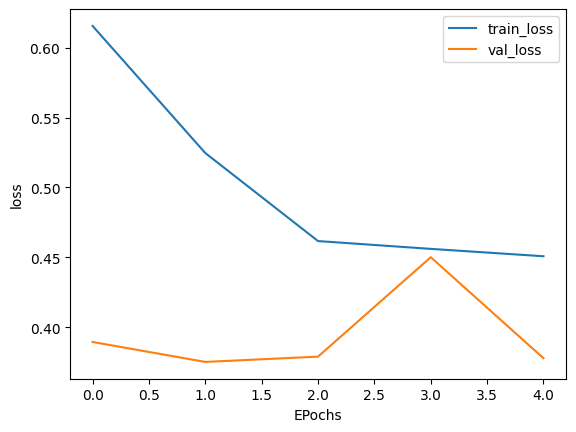

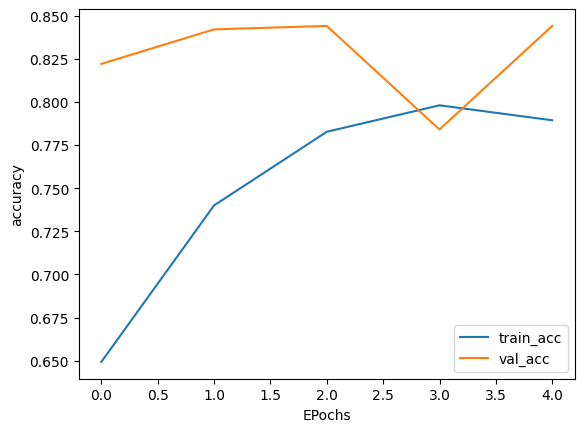

In [ ]:
plot_loss_curves(history8)

In [ ]:
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


--2023-06-26 11:23:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2023-06-26 11:23:45 (43.9 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

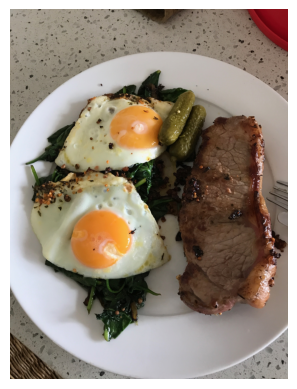

In [ ]:
import matplotlib.image as mpimg

!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
filename = '03-steak.jpeg'
img = mpimg.imread(filename)
plt.imshow(img)
plt.axis(False)

In [ ]:
#check the shape
img.shape

(4032, 3024, 3)

In [ ]:
#expand the dim
img = tf.expand_dims(img, axis=0)
img.shape

TensorShape([1, 4032, 3024, 3])

In [ ]:
model8.predict(img)

ValueError: ignored

need to resize the image as per model requisite

In [ ]:
def load_prep_image(filename, img_shape=224):
    #read the image
    img=tf.io.read_file(filename)

    #decode into a tensor
    img = tf.image.decode_image(img)

    #resize the img
    img = tf.image.resize(img, size=[img_shape, img_shape])

    #rescale
    img = img/255.
    return img



In [ ]:
# import matplotlib.image as mpimg
# def load_prep_image(filename, img_shape=224):
#     #read the image
#     img=mpimg.imread(filename, ta)

#     #decode into a tensor
#     img = tf.image.decode_image(img)

#     #resize the img
#     img = tf.image.resize(img, size=[img_shape, img_shape])

#     #rescale
#     img = img/255.
#     return img


In [ ]:
#preprocess
img = load_prep_image(filename)
img = tf.expand_dims(img, axis=0)

#prediction
prob = model8.predict(img)
prob

1/1 [==============================] - 0s 490ms/step


array([[0.75386304]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(prob))]

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
    #load and prepare image
    img = load_prep_image(filename)

    #expand dims to include batch dim
    img = tf.expand_dims(img, axis=0)

    #make prediction
    prob = model.predict(img)
    print(prob)
    #get the predicted class
    pred_class = class_names[int(tf.round(prob))]

    #plot the image and prediction
    plt.imshow(tf.squeeze(img))
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False)


--2023-06-26 11:07:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2023-06-26 11:07:07 (72.9 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 18ms/step
[[0.25232902]]


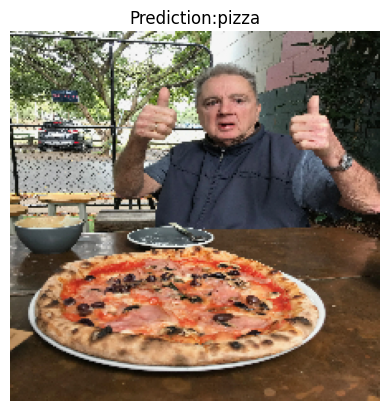

In [ ]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'
filename = '03-pizza-dad.jpeg'
pred_and_plot(model8, filename, class_names=class_names)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

Saving pizza_1.jpg to pizza_1.jpg
Saving pizza_3.jpg to pizza_3.jpg
Saving steak_1.jpg to steak_1.jpg
1/1 [==============================] - 0s 20ms/step
[[0.16934296]]
1/1 [==============================] - 0s 19ms/step
[[0.20812678]]
1/1 [==============================] - 0s 20ms/step
[[0.37085742]]


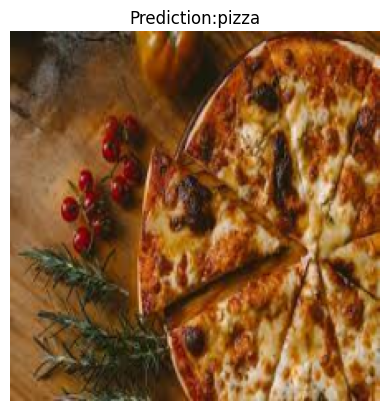

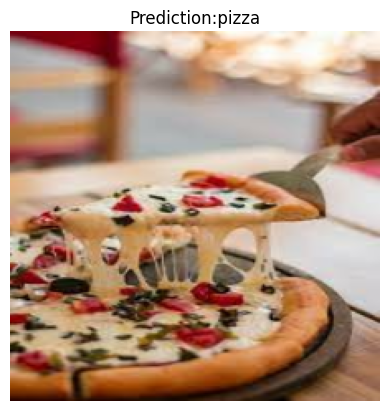

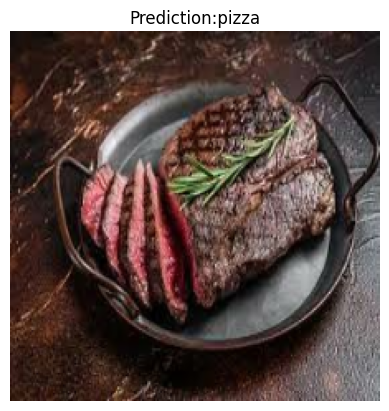

<Figure size 640x480 with 0 Axes>

In [ ]:
#multiple custom image prediction in colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded:
  pred_and_plot(model8, fn, class_names=class_names)
  plt.figure()

## Multi-class Image classification

1. Become one with data
2. Preprocess and prepare the data
3. Create a baseline model
4. Fit the model
5. Evalute the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

#1. Import and become one with data

In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip'

--2023-06-26 11:07:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 173.194.203.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   160MB/s    in 3.1s    

2023-06-26 11:07:41 (160 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile

local = '/content/10_food_classes_all_data.zip'
zipref = zipfile.ZipFile(local)
zipref.extractall()
zipref.close()

In [ ]:
#viewing directories and files

import os
for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_all_data'):
    print(f"{len(dirnames)} directories, {len(filenames)} files in {dirpath}")

2 directories, 0 files in /content/10_food_classes_all_data
10 directories, 0 files in /content/10_food_classes_all_data/train
0 directories, 750 files in /content/10_food_classes_all_data/train/fried_rice
0 directories, 750 files in /content/10_food_classes_all_data/train/steak
0 directories, 750 files in /content/10_food_classes_all_data/train/hamburger
0 directories, 750 files in /content/10_food_classes_all_data/train/ice_cream
0 directories, 750 files in /content/10_food_classes_all_data/train/grilled_salmon
0 directories, 750 files in /content/10_food_classes_all_data/train/chicken_curry
0 directories, 750 files in /content/10_food_classes_all_data/train/ramen
0 directories, 750 files in /content/10_food_classes_all_data/train/chicken_wings
0 directories, 750 files in /content/10_food_classes_all_data/train/pizza
0 directories, 750 files in /content/10_food_classes_all_data/train/sushi
10 directories, 0 files in /content/10_food_classes_all_data/test
0 directories, 250 files in /

In [ ]:
train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

In [ ]:
#visualize, visualize, visualize

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
data_dir

PosixPath('/content/10_food_classes_all_data/train')

In [ ]:
sorted([item for item in os.listdir(train_dir)])

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
sorted([item.name for item in data_dir.glob('*')])

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
class_names = sorted([item.name for item in data_dir.glob('*')])

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def view_random_image(target_dir, target_class):
    dir_path = os.path.join(target_dir, target_class)
    #print(dir_path)
    random_img_file = random.sample(os.listdir(dir_path), 1) #random.sample() does not produce repeating elements, while random.choices() does.
    img_file = random_img_file[0] # random.sample returns list
    #print(img_file)
    img_path = os.path.join(dir_path, img_file)
    #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis(False)
    plt.title(target_class)
    print(f"Image shape: {img.shape}")



Image shape: (512, 512, 3)


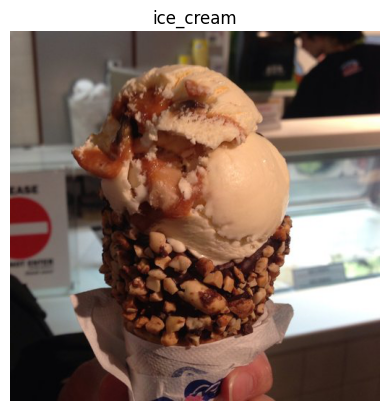

In [ ]:
import random

img = view_random_image(train_dir, target_class=random.choice(class_names))

#Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255.)
train_gen = train_datagen.flow_from_directory(train_dir,
                                              class_mode='categorical', #categorical - onhot encode labels
                                              batch_size=32,
                                              target_size=(224,224))

test_datagen = ImageDataGenerator(rescale=1./255.)
test_gen = test_datagen.flow_from_directory(test_dir,
                                            class_mode='categorical',
                                            batch_size=32,
                                            target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


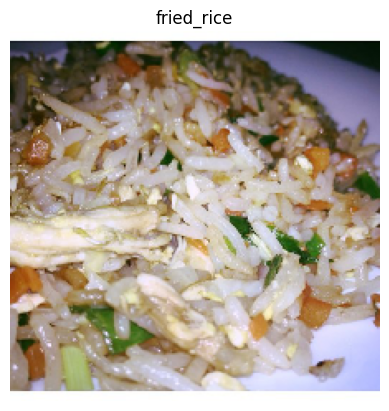

In [ ]:
images, labels = train_gen.next()
#print(images[0])
plt.imshow(images[0])
plt.title(class_names[np.argmax(labels[0])])
plt.axis(False)
print(labels[0])

**Note** - the labels are one hot encoded

In [ ]:
import tensorflow as tf

#Create model (VGG model CNN explainer web)
model9 = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')

])

In [ ]:
#model9 summary
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
#compile model
model9.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])



In [ ]:
#fit the model
history9 = model9.fit(train_gen,
           epochs=5,
           steps_per_epoch=len(train_gen),
           validation_data=test_gen,
           validation_steps=len(test_gen))

Epoch 1/5
235/235 [==============================] - 74s 309ms/step - loss: 2.1985 - accuracy: 0.1904 - val_loss: 2.0109 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 71s 302ms/step - loss: 1.9010 - accuracy: 0.3515 - val_loss: 1.8387 - val_accuracy: 0.3620
Epoch 3/5
235/235 [==============================] - 71s 303ms/step - loss: 1.5972 - accuracy: 0.4676 - val_loss: 1.8472 - val_accuracy: 0.3564
Epoch 4/5
235/235 [==============================] - 65s 278ms/step - loss: 1.1245 - accuracy: 0.6333 - val_loss: 2.1174 - val_accuracy: 0.3324
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.5836 - accuracy: 0.8155 - val_loss: 2.7908 - val_accuracy: 0.3144


## Evaluate the model


In [ ]:
model9.evaluate(test_gen)

79/79 [==============================] - 13s 160ms/step - loss: 2.7908 - accuracy: 0.3144


[2.790809392929077, 0.31439998745918274]

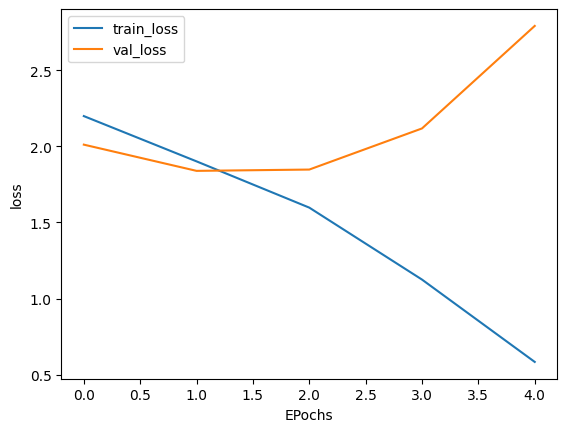

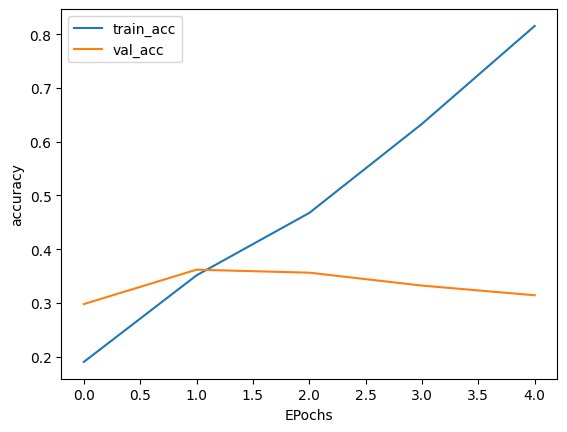

In [ ]:
plot_loss_curves(history9)

Obervation:
- train curves shows our model is learning something
- train and test curves diverging away, with test peforming poor
- overfitting, performs poorly on test data (model is complicated)

In [ ]:
#adjust the model parameters to imporve the model, lets remove here extra conv layers to simplify te model

model10 =tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model10.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model10.summary() # check the #parameters compared to  model9

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 29160)             0         
                                                                 
 dense_16 (Dense)            (None, 10)              

In [ ]:
history10 = model10.fit(train_gen,
            epochs=5,
            steps_per_epoch=len(train_gen),
            validation_data=test_gen,
            validation_steps=len(test_gen))

Epoch 1/5
235/235 [==============================] - 52s 213ms/step - loss: 2.1127 - accuracy: 0.2473 - val_loss: 1.9450 - val_accuracy: 0.3044
Epoch 2/5
235/235 [==============================] - 50s 213ms/step - loss: 1.7821 - accuracy: 0.3951 - val_loss: 1.8956 - val_accuracy: 0.3520
Epoch 3/5
235/235 [==============================] - 50s 211ms/step - loss: 1.4278 - accuracy: 0.5339 - val_loss: 1.9326 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 50s 212ms/step - loss: 0.9400 - accuracy: 0.7043 - val_loss: 2.2574 - val_accuracy: 0.3092
Epoch 5/5
235/235 [==============================] - 50s 211ms/step - loss: 0.4976 - accuracy: 0.8587 - val_loss: 2.6862 - val_accuracy: 0.3144


79/79 [==============================] - 12s 157ms/step - loss: 2.6862 - accuracy: 0.3144


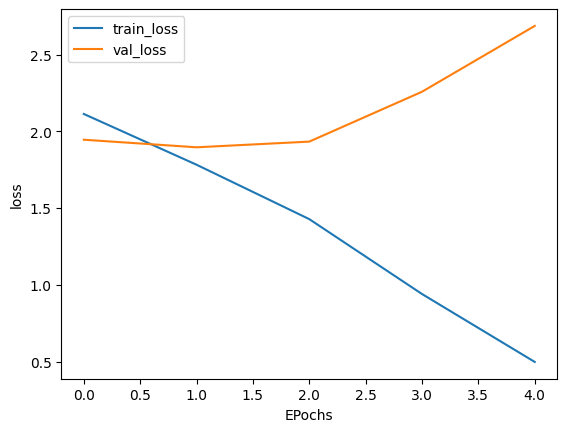

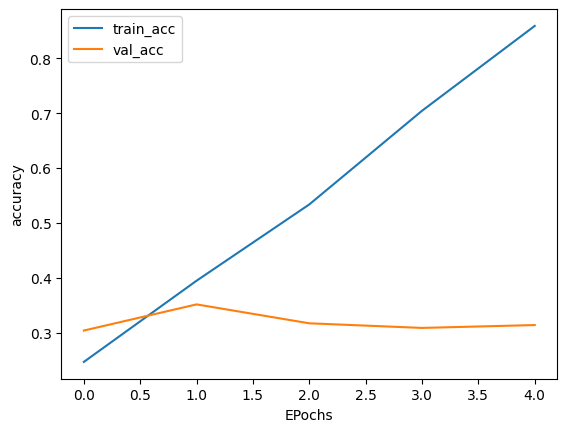

In [ ]:
model10.evaluate(test_gen)
plot_loss_curves(history10)

Removing Conv2d layers did not help

Try Data AUgmentation to:
- reduce overfitting
- to improve validation accuracy

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             height_shift_range=0.2,
                                             width_shift_range=0.2,
                                             rotation_range=0.2,
                                             horizontal_flip=True)
train_gen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  class_mode='categorical',
                                                                  target_size=(224,224),
                                                                  batch_size=32)

Found 7500 images belonging to 10 classes.


In [ ]:
model11 = tf.keras.models.clone_model(model9)

In [ ]:
model11.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

In [ ]:
model11.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
history11=model11.fit(train_gen_augmented,
            epochs=5,
            steps_per_epoch=len(train_gen_augmented),
            validation_data=test_gen,
            validation_steps=len(test_gen))

Epoch 1/5
235/235 [==============================] - 126s 527ms/step - loss: 2.2153 - accuracy: 0.1792 - val_loss: 2.0648 - val_accuracy: 0.2300
Epoch 2/5
235/235 [==============================] - 123s 526ms/step - loss: 2.0884 - accuracy: 0.2619 - val_loss: 1.9405 - val_accuracy: 0.3172
Epoch 3/5
235/235 [==============================] - 124s 529ms/step - loss: 2.0089 - accuracy: 0.2961 - val_loss: 1.8886 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 124s 528ms/step - loss: 1.9637 - accuracy: 0.3223 - val_loss: 1.7816 - val_accuracy: 0.3820
Epoch 5/5
235/235 [==============================] - 125s 534ms/step - loss: 1.9294 - accuracy: 0.3351 - val_loss: 1.8154 - val_accuracy: 0.3872


In [ ]:
model11.evaluate(test_gen)

79/79 [==============================] - 13s 160ms/step - loss: 1.8154 - accuracy: 0.3872


[1.8153513669967651, 0.3871999979019165]

In [ ]:
model9.evaluate(test_gen)

79/79 [==============================] - 12s 156ms/step - loss: 2.7908 - accuracy: 0.3144


[2.7908098697662354, 0.31439998745918274]

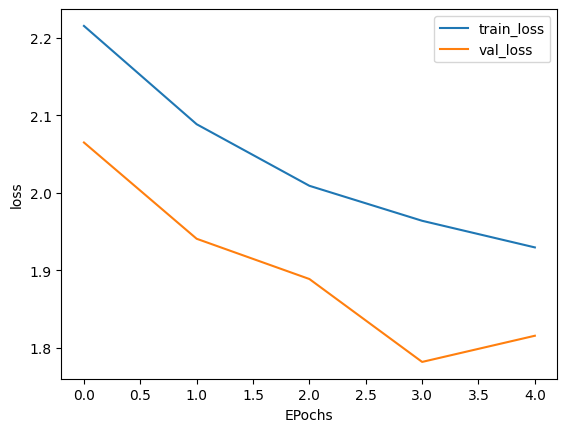

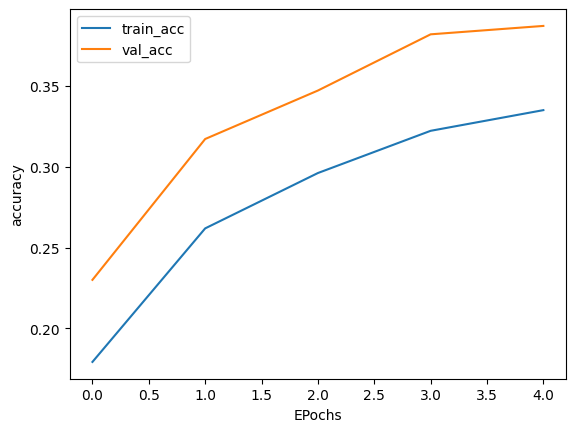

In [ ]:
plot_loss_curves(history11)

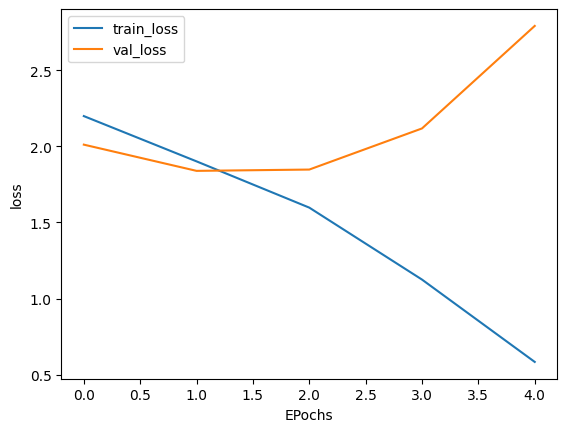

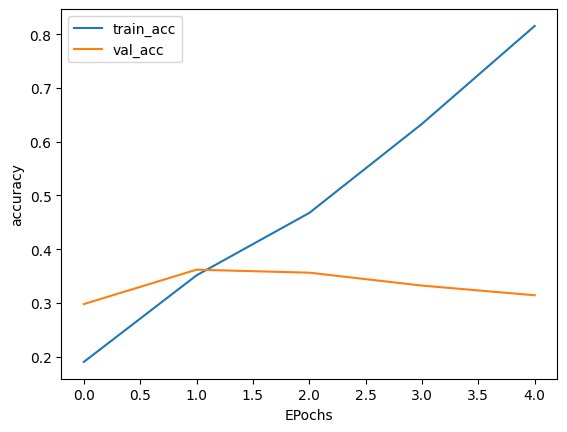

In [ ]:
plot_loss_curves(history9)

##Repeat until satisfied

Continually trying to improve model
- different architechture
- adjust the learning rate
- train longer
- try diff. activation function, optimizer
- try transfer learning

## Model Predictions

In [ ]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg'
!wget  'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg'
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg'
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg'

--2023-06-26 11:49:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.05s   

2023-06-26 11:49:13 (67.6 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2023-06-26 11:49:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
def load_prep_image(filename, img_shape=224):
    #read the image
    img=tf.io.read_file(filename)

    #decode into a tensor
    img = tf.image.decode_image(img)

    #resize the img
    img = tf.image.resize(img, size=[img_shape, img_shape])

    #rescale
    img = img/255.
    return img

def pred_and_plot(model, filename, class_names=class_names):
    #load and prepare image
    img = load_prep_image(filename)

    #expand dims to include batch dim
    img = tf.expand_dims(img, axis=0)

    #make prediction
    prob = model.predict(img)
    #print(prob)

    #get the predicted class
    if len(prob[0])>1:
      pred_class = class_names[tf.argmax(prob[0])]
    else:
      pred_class = class_names[int(tf.round(prob))]

    #plot the image and prediction
    plt.imshow(tf.squeeze(img))
    plt.title(f"Prediction:{pred_class}")
    plt.axis(False)


In [ ]:
class_names = sorted([item.name for item in data_dir.glob('*')])
print(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

1/1 [==============================] - 0s 22ms/step
[[0.042003   0.05661134 0.05003071 0.05900057 0.14477153 0.11155605
  0.15056096 0.11058135 0.13972403 0.13516046]]


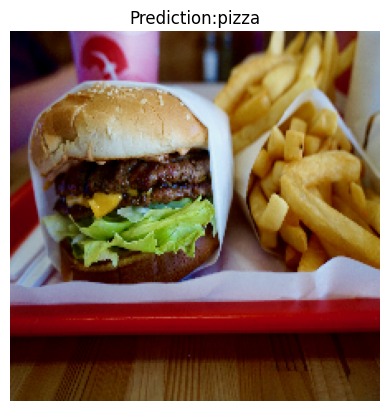

In [ ]:
filename='03-hamburger.jpeg'
pred_and_plot(model11, filename, class_names=class_names)

1/1 [==============================] - 0s 18ms/step
[0.01145235 0.03627812 0.09061515 0.01477921 0.06100383 0.20772196
 0.3749003  0.04142915 0.0889122  0.0729077 ]


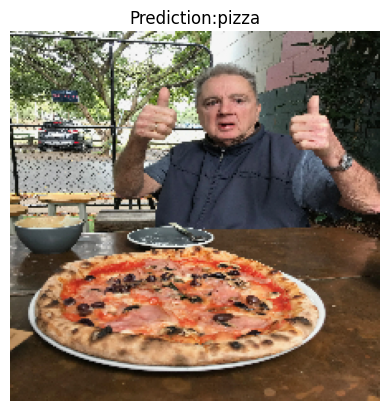

In [ ]:
filename='03-pizza-dad.jpeg'
pred_and_plot(model11, filename, class_names=class_names)

1/1 [==============================] - 0s 21ms/step
[0.03494987 0.15566117 0.04411601 0.15519132 0.09136539 0.08515987
 0.05664606 0.02919788 0.282577   0.06513541]


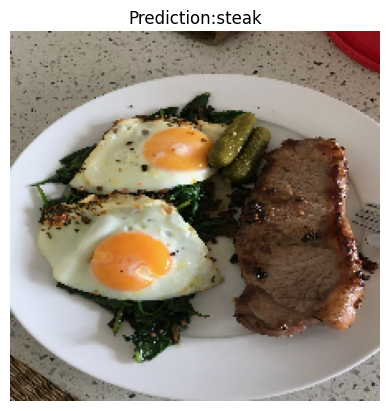

In [ ]:
filename='03-steak.jpeg'
pred_and_plot(model11, filename, class_names=class_names)

1/1 [==============================] - 0s 20ms/step
[0.1357672  0.17710626 0.01595882 0.06017533 0.11816062 0.13713874
 0.11079644 0.04606811 0.10407778 0.09475065]


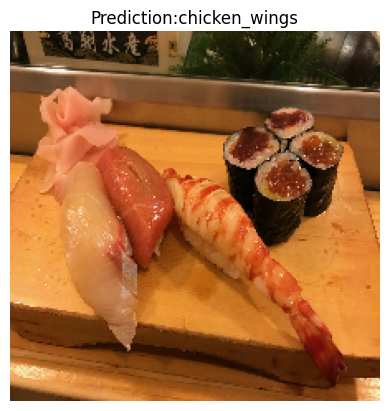

In [ ]:
filename='03-sushi.jpeg'
pred_and_plot(model11, filename, class_names=class_names)

try pred model function on binary model

1/1 [==============================] - 0s 21ms/step
[[0.25232902]]


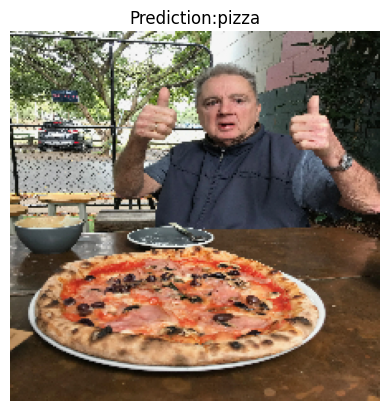

In [ ]:
filename='03-pizza-dad.jpeg'
class_names=['pizza', 'steak']
pred_and_plot(model8, filename, class_names=class_names)

# Save and load model

In [ ]:
model11.save('model_clf')

Check if loaded model performs same as model11

In [ ]:
# Load in a model and evaluate it
model_loaded = tf.keras.models.load_model('model_clf')
model_loaded.evaluate(test_gen)

79/79 [==============================] - 12s 156ms/step - loss: 1.8154 - accuracy: 0.3872


[1.815351128578186, 0.3871999979019165]

In [ ]:
# Compare our unsaved model's results (same as above)
model11.evaluate(test_gen)

79/79 [==============================] - 13s 166ms/step - loss: 1.8154 - accuracy: 0.3872


[1.8153510093688965, 0.3871999979019165]